## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stat

# Dataset 
The dataset contains 6574 instances of daily averaged responses from an array of 5 weather variables sensors embedded in a meteorological station. The device was located on the field in a significantly empty area, at 21M. Data were recorded from January 1961 to December 1978 (17 years). Ground Truth daily averaged precipitations, maximum and minimum temperatures, and grass minimum temperature were provided.

Attribute Information

DATE (YYYY-MM-DD)
WIND: Average wind speed (knots)
IND: First indicator value
RAIN: Precipitation Amount (mm)
IND.1: Second indicator value
T.MAX: Maximum Temperature (°C)
IND.2: Third indicator value
T.MIN: Minimum Temperature (°C)
T.MIN.G: 09utc Grass Minimum Temperature (°C)
Data Source: https://www.kaggle.com/datasets/fedesoriano/wind-speed-prediction-dataset

## Data Description

In [ ]:
df = pd.read_csv("/content/wind_dataset.csv")
pd.set_option("display.max_columns", None)
df.head(40)

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
5,1961-01-06,10.67,0,0.0,0.0,6.5,0.0,1.2,-2.0
6,1961-01-07,9.17,0,1.9,0.0,9.2,1.0,-2.4,-7.1
7,1961-01-08,14.29,0,0.0,0.0,6.6,0.0,3.1,0.0
8,1961-01-09,8.04,0,8.3,0.0,6.8,0.0,2.4,-0.8
9,1961-01-10,11.42,0,0.0,0.0,6.5,0.0,3.0,0.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [ ]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [ ]:
print(df.nunique())

DATE       6574
WIND        580
IND           3
RAIN        226
IND.1         4
T.MAX       246
IND.2         5
T.MIN       247
T.MIN.G     283
dtype: int64


## EDA/ Data Preproccesing

## Segregating the dataset into various data types

1. Numerical feature
2. Discrete feature
3. Continuous feature
4. Categorical feature

In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 8
Discrete feature Count 3
Continuous feature Count 5
Categorical feature Count 1


## Checking whether the dataset have any missing values

In [ ]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

DATE        0.000000
WIND        0.000000
IND         0.000000
RAIN        0.000000
IND.1       0.927898
T.MAX       9.446304
IND.2       0.927898
T.MIN      10.252510
T.MIN.G     5.476118
dtype: float64

## As majority of features in the dataset have numerical values.
### So, we are considering it as regreesion problem.

In [ ]:
print(numerical_feature)

['WIND', 'IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN', 'T.MIN.G']


## So, we are using Random sample Imputation

1. Random Sample Imputation take a random observation from the feature.
2. After that we use random observation to replace NaN in that feature.
  It should be used when data is missing completely at random (MCAR)

In [ ]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

## We are implemeting RandomSampleImputation for 5 of the continous features as it has NaN values

In [ ]:
randomsampleimputation(df, "IND.1")
randomsampleimputation(df, "T.MAX")
randomsampleimputation(df, "IND.2")
randomsampleimputation(df, "T.MIN")
randomsampleimputation(df, "T.MIN.G")

In [ ]:
df.head(12)

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
5,1961-01-06,10.67,0,0.0,0.0,6.5,0.0,1.2,-2.0
6,1961-01-07,9.17,0,1.9,0.0,9.2,1.0,-2.4,-7.1
7,1961-01-08,14.29,0,0.0,0.0,6.6,0.0,3.1,0.0
8,1961-01-09,8.04,0,8.3,0.0,6.8,0.0,2.4,-0.8
9,1961-01-10,11.42,0,0.0,0.0,6.5,0.0,3.0,0.5


## Correlation matrix before handling missing values

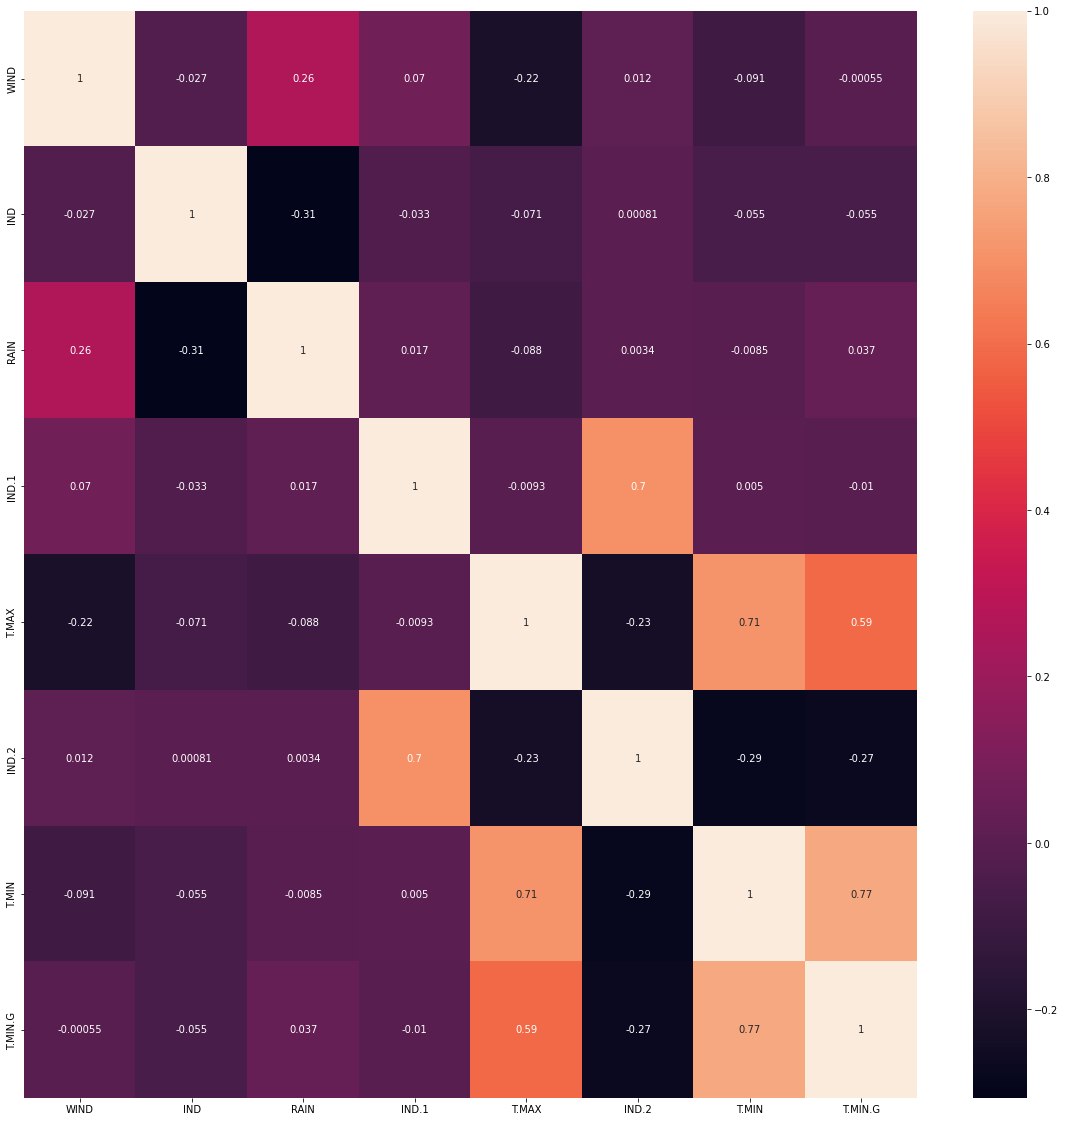

In [ ]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

## Seaborn Distplot

### distplot plots a univariate distribution of observations and  shows a histogram with a line on it.
### This can be used shown for all kinds of variations

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


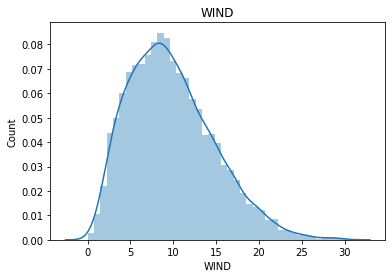

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


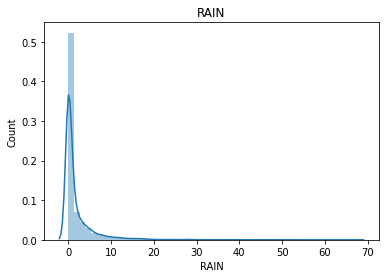

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


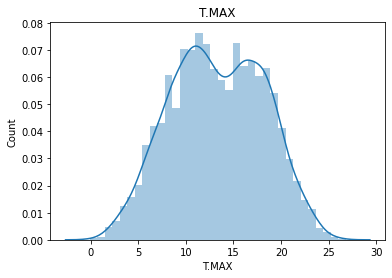

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


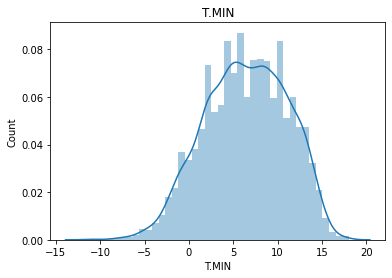

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


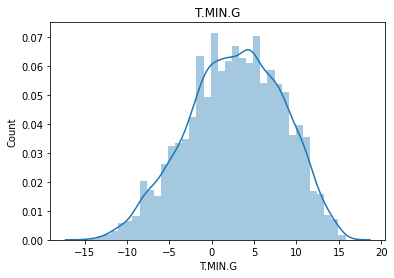

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

## Box Plot
### A for loop is used to plot a boxplot for all the continuous features to see the outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

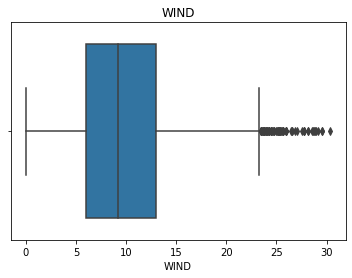

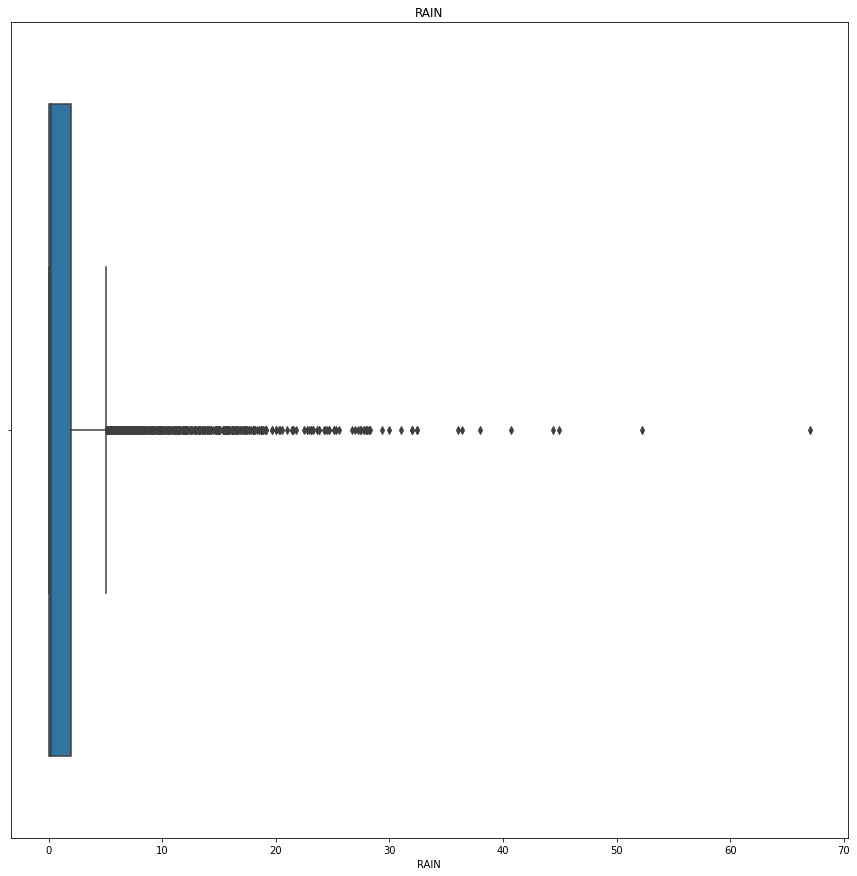

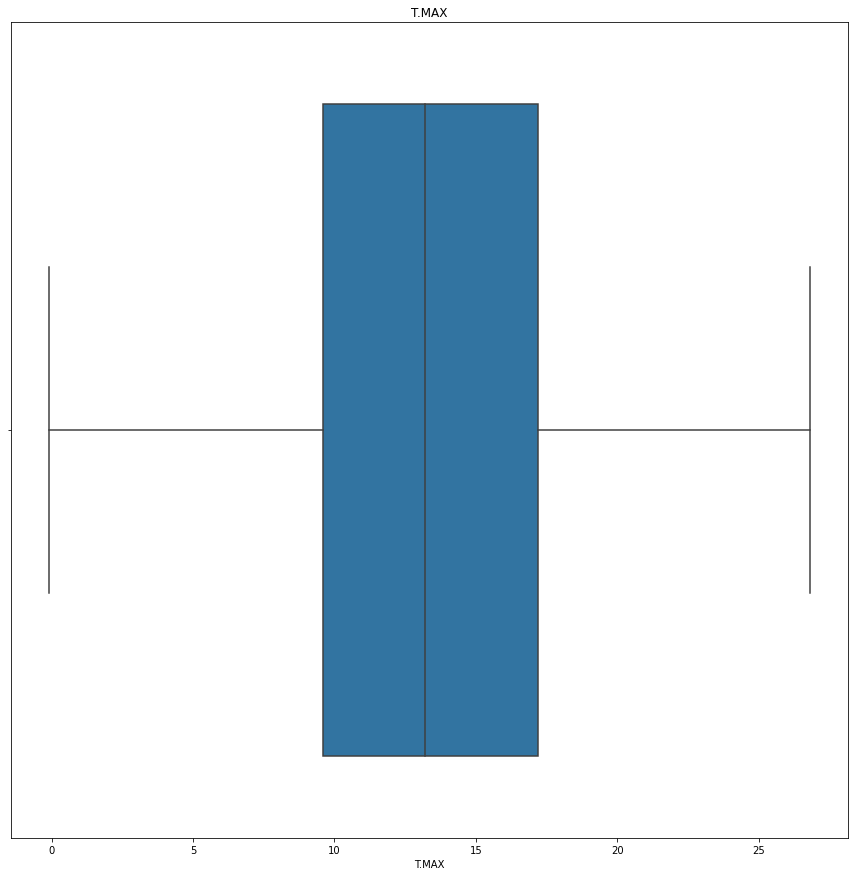

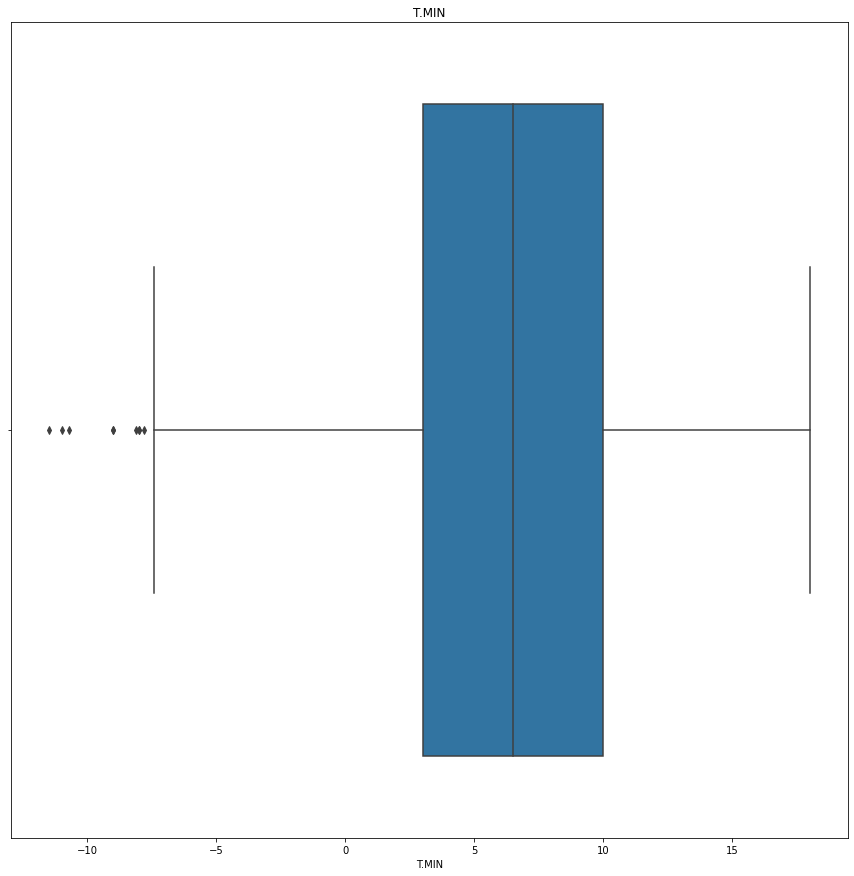

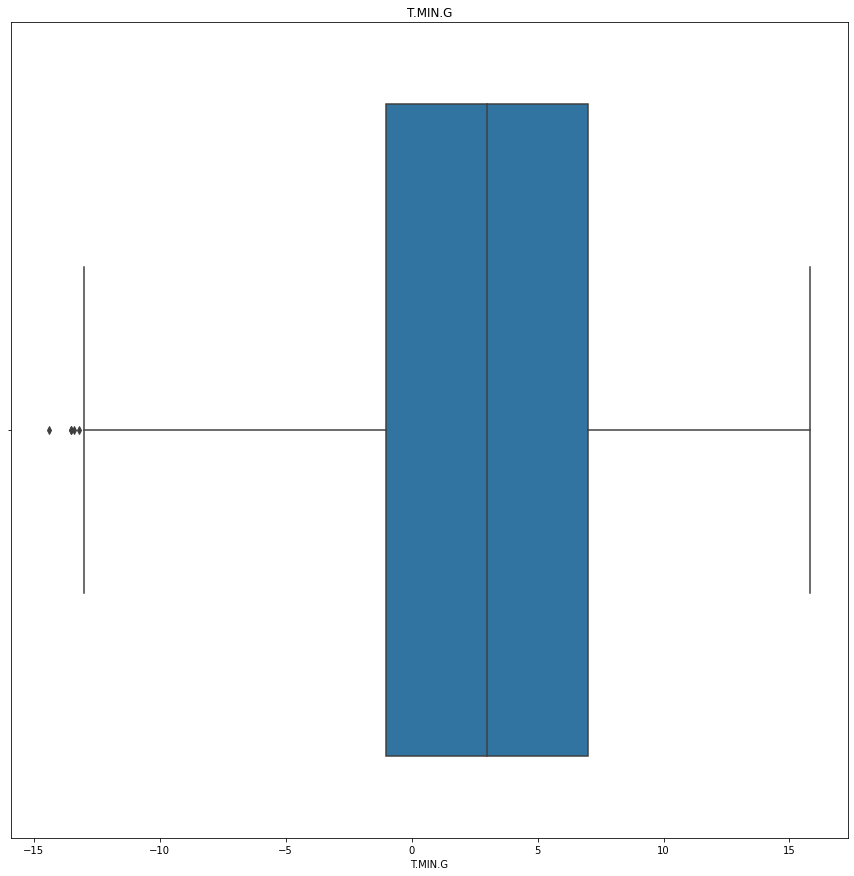

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

## Impute missing values with Median:
Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data compared to the earlier method. Replacing the approximations (median) is a statistical approach to handle the missing values.

In [ ]:
print(continuous_feature)

['WIND', 'RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']


In [ ]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [ ]:
df.isnull().sum()*100/len(df)

DATE       0.0
WIND       0.0
IND        0.0
RAIN       0.0
IND.1      0.0
T.MAX      0.0
IND.2      0.0
T.MIN      0.0
T.MIN.G    0.0
dtype: float64

In [ ]:
discrete_feature

['IND', 'IND.1', 'IND.2']

In [ ]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"IND")
mode_nan(df,"IND.1")
mode_nan(df,"IND.2")

## We need to convert the DATE dtype from object to a datetime

In [ ]:
df["DATE"] = pd.to_datetime(df["DATE"], format = "%Y-%m-%dT", errors = "coerce")

In [ ]:
df["Date_year"] = df["DATE"].dt.year
df["Date_month"] = df["DATE"].dt.month
df["Date_day"] = df["DATE"].dt.day

In [ ]:
df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,Date_year,Date_month,Date_day
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0,1978,12,27
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0,1978,12,28
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2,1978,12,29
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5,1978,12,30


## Correlation matrix after handling missing values

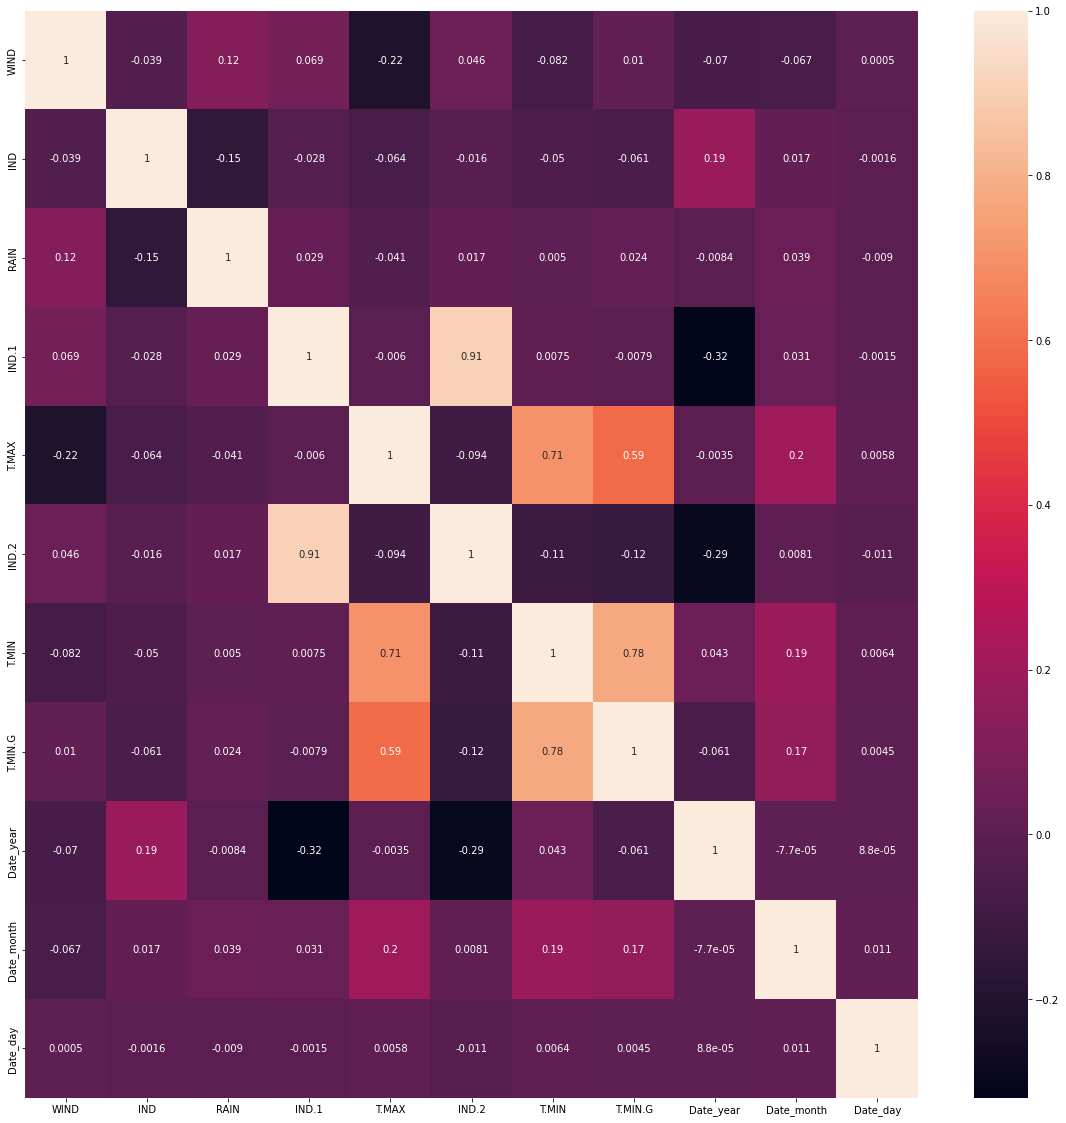

In [ ]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

## Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

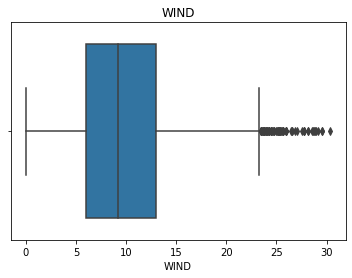

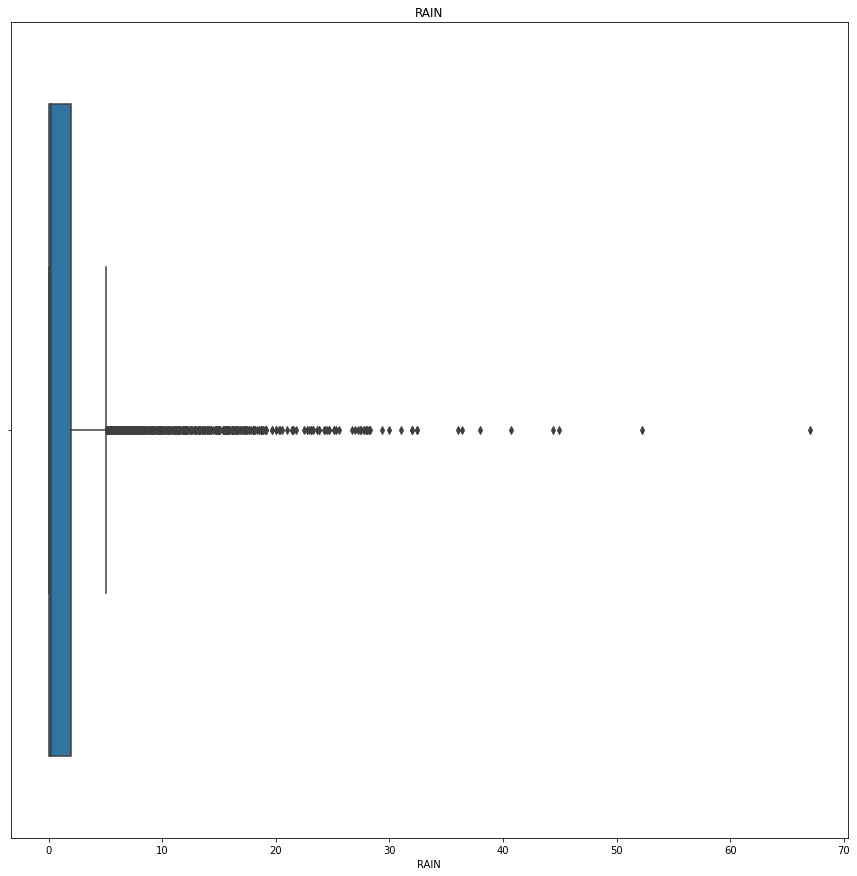

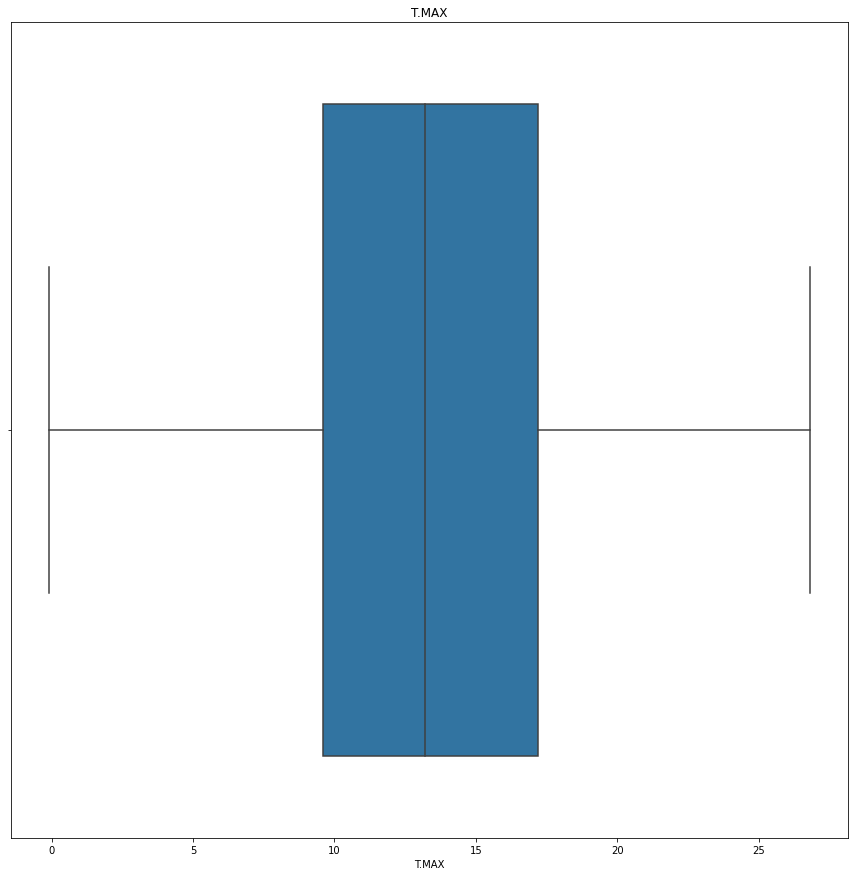

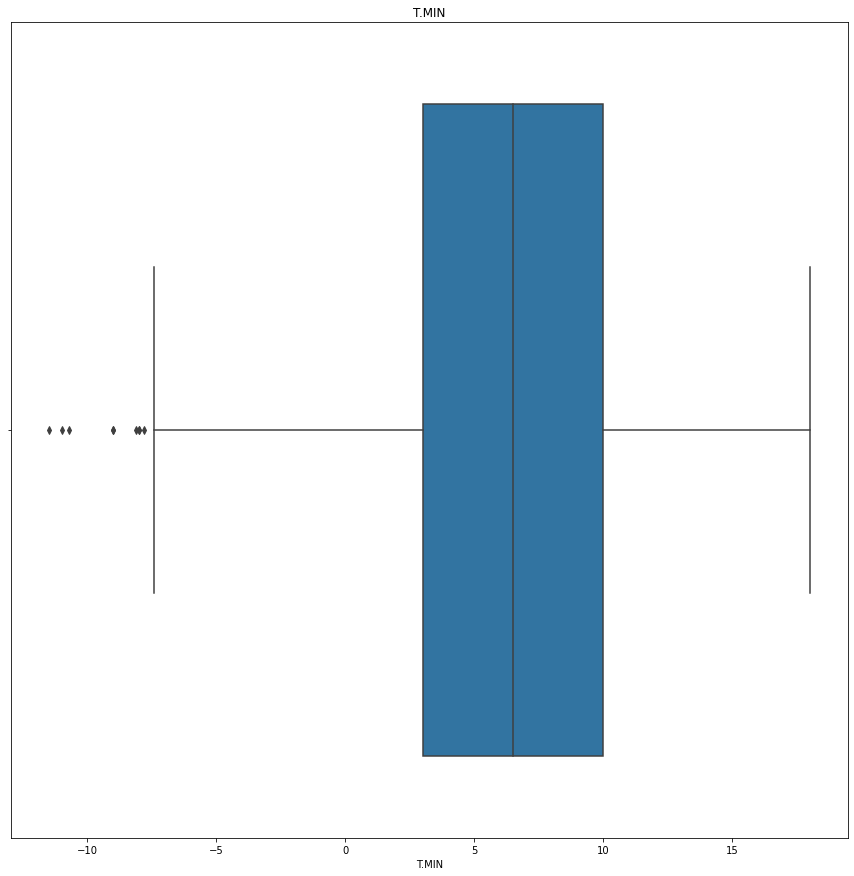

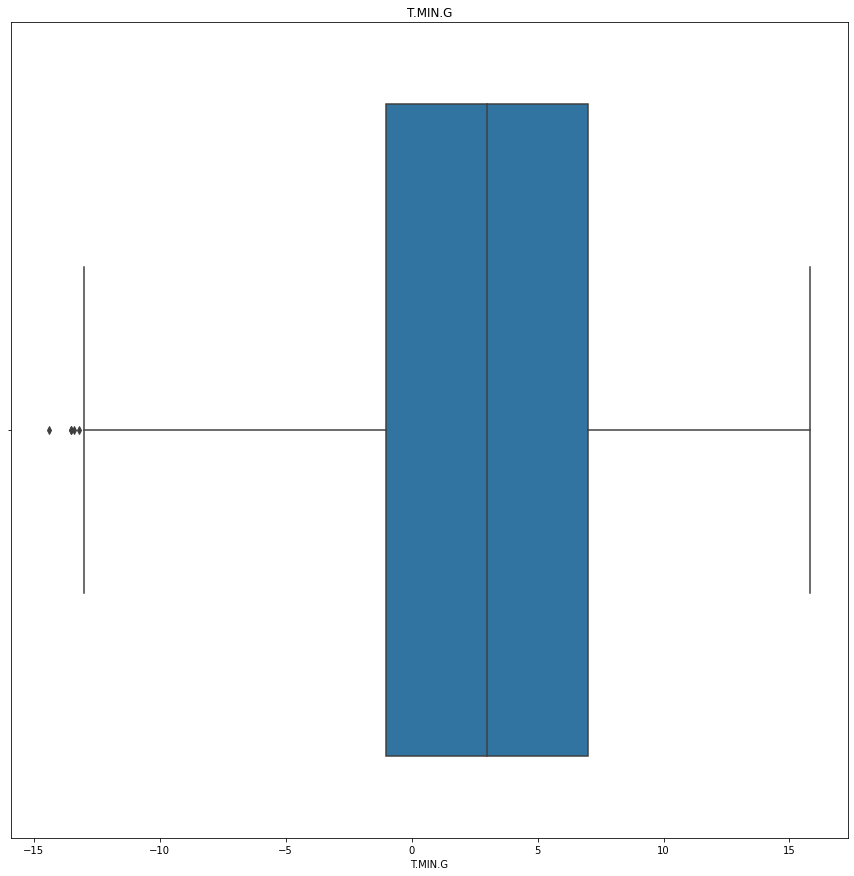

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

## qqplot (Quantile-Quantile Plot)
When the quantiles of two variables are plotted against each other, then the plot obtained is known as quantile – quantile plot or qqplot. This plot provides a summary of whether the distributions of two variables are similar or not with respect to the locations.

### All point of quantiles lie on or close to straight line at an angle of 45 degree from x – axis. It indicates that two samples have similar distributions. But in practical it is not possible. Anyhow, the points are lying nearly on the straight line are considerd to be a good model.

In [ ]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [ ]:
import scipy.stats as stats

WIND


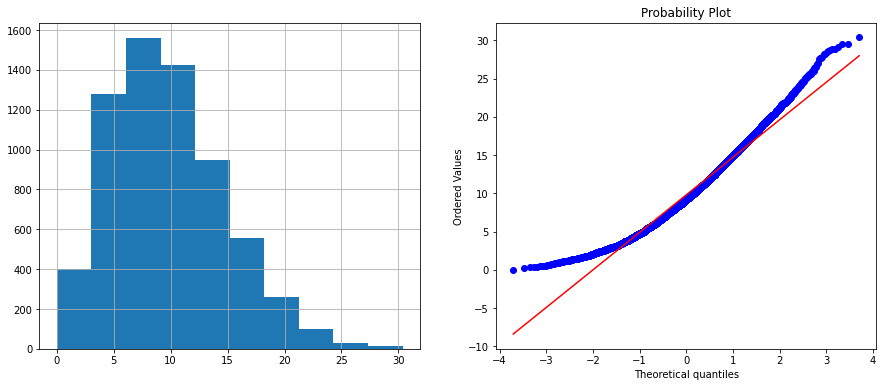

RAIN


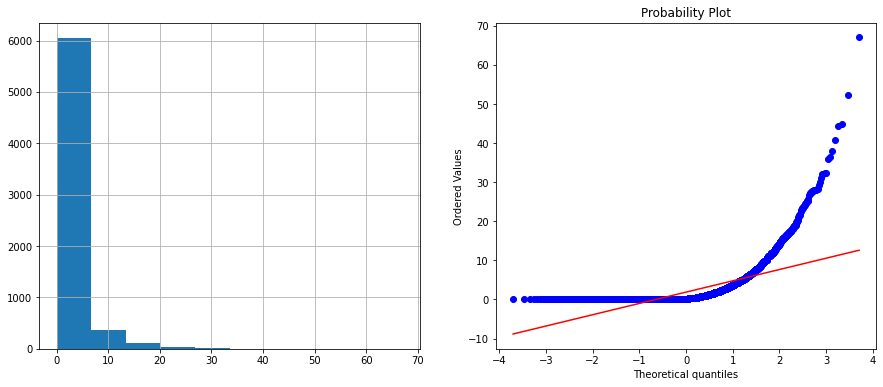

T.MAX


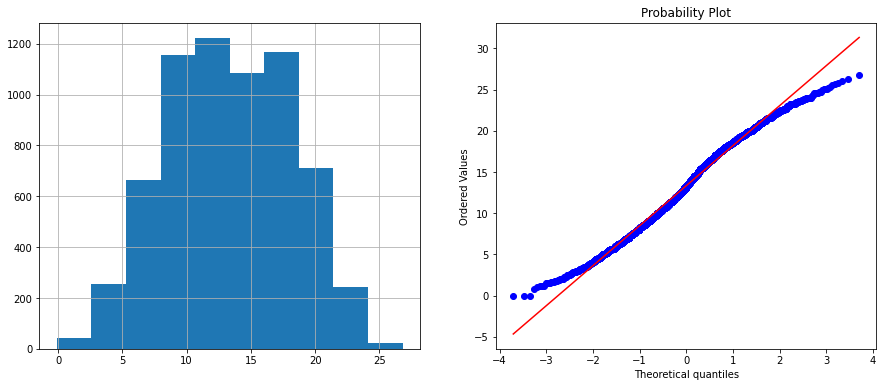

T.MIN


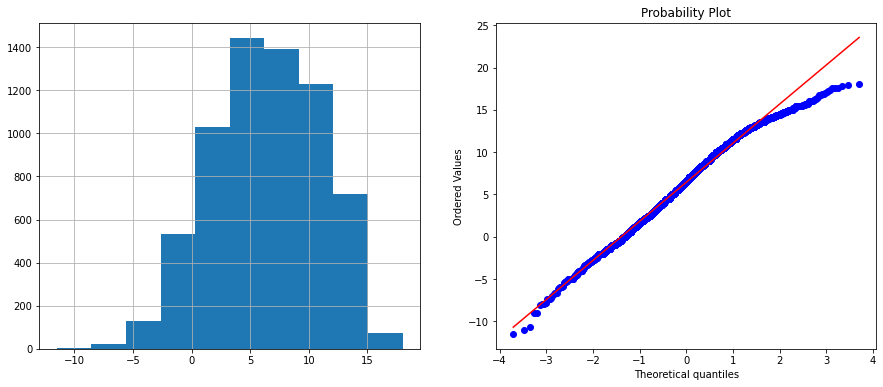

T.MIN.G


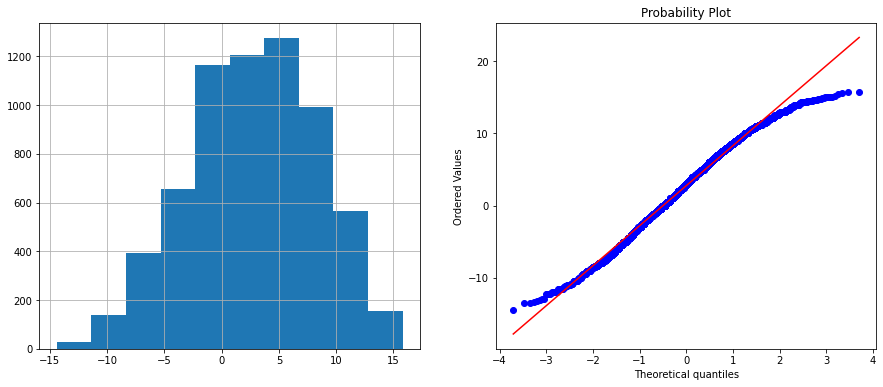

In [ ]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

## Cleaned and Saving the preprocessed model to .csv file

In [ ]:
df.to_csv("preprocessed_wind_data.csv", index=False)

## Dropping unwanted columns

In [ ]:
X = df.drop(["WIND", "DATE"], axis=1)
Y = df["WIND"]

### Splitting the data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=123)

In [ ]:
y_train

2448     2.96
640      7.33
1604     8.96
6096    20.46
3286    14.58
        ...  
5218     5.54
4060    12.58
1346    12.33
3454    11.96
3582    12.25
Name: WIND, Length: 4404, dtype: float64

In [ ]:
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (4404, 10) (4404,)
Testing dataset shape: (2170, 10) (2170,)


In [ ]:
import joblib

# Linear Regression


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, lin_pred))
print('MSE:', metrics.mean_squared_error(y_test, lin_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lin_pred)))

MAE: 3.867507352181555
MSE: 23.37803262937409
RMSE: 4.835083518345272


# Decision Tree


In [ ]:

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 4.732428571428571
MSE: 36.70507267281106
RMSE: 6.058471149787796


# Random Forest Regressor

In [ ]:


from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 3.748660868447037
MSE: 22.24635939060412
RMSE: 4.716604646417179


# Support vector Regressor

In [ ]:


from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1, epsilon=10)
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 4.5536372542703925
MSE: 29.558055724485694
RMSE: 5.436732081359692


# Light GBM

In [ ]:

!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    "num_leaves": 128,  
    "max_bin": 512,
}

In [ ]:
rg = lgb.LGBMRegressor(**hyper_params)

In [ ]:
rg.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.005, max_bin=512, metric=['l2', 'auc'],
              num_leaves=128, objective='regression', task='train')

In [ ]:
rg_pred = rg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, rg_pred))
print('MSE:', metrics.mean_squared_error(y_test, rg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rg_pred)))

MAE: 3.7313068076514764
MSE: 21.73677021701165
RMSE: 4.662270929172998


## Tabulating the output values from the model

In [ ]:
from tabulate import tabulate

In [ ]:
all_data = [["Regression Models","MAE","MSE","RMSE"],
            ["Light GBM",3.73, 21.74, 4.66],
            ["Random Forest Regressor",3.75,22.25,4.72],
            ["Linear Regression",3.87,23.38,4.84],
            ["Support vector Regressor",4.55,29.56,5.44],
            ["Decision Tree Regressor",4.79,38.10,6.17]]

In [ ]:
print(tabulate(all_data,headers='firstrow',tablefmt='fancy_grid'))

╒══════════════════════════╤═══════╤═══════╤════════╕
│ Regression Models        │   MAE │   MSE │   RMSE │
╞══════════════════════════╪═══════╪═══════╪════════╡
│ Light GBM                │  3.73 │ 21.74 │   4.66 │
├──────────────────────────┼───────┼───────┼────────┤
│ Random Forest Regressor  │  3.75 │ 22.25 │   4.72 │
├──────────────────────────┼───────┼───────┼────────┤
│ Linear Regression        │  3.87 │ 23.38 │   4.84 │
├──────────────────────────┼───────┼───────┼────────┤
│ Support vector Regressor │  4.55 │ 29.56 │   5.44 │
├──────────────────────────┼───────┼───────┼────────┤
│ Decision Tree Regressor  │  4.79 │ 38.1  │   6.17 │
╘══════════════════════════╧═══════╧═══════╧════════╛
